In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [12]:

f = open('output-all-ended.t2')
f2 = open('new.txt','w')
sign = 0
for line in f:

    if sign == 0:
        if 'begin Tuple' in line:
            sign = 1 
    else:
        if 'end of' in line:
            sign = 0
            continue
        if 'src' in line:
            f2.write(line.split('#')[1])
        else:
            f2.write(line)
f.close
f2.close


<function TextIOWrapper.close()>

In [2]:
df = pd.read_csv('new.txt', sep="\t")
display(df)

,src,dst,pro,ok,sport,dport,pkts,bytes,flows,first,latest
0,216.53.250.125,163.35.156.134,6,1,80,55966,1,40,1,1.491968e+09,1.491968e+09
1,216.53.250.2,163.35.245.81,6,1,443,54177,5,470,1,1.491969e+09,1.491969e+09
2,216.53.250.114,202.140.204.237,6,1,443,56090,2,104,1,1.491973e+09,1.491973e+09
3,216.53.250.113,163.35.95.96,6,1,80,50395,2,112,1,1.491979e+09,1.491979e+09
4,216.53.250.125,163.35.139.229,6,1,443,59147,7,4582,1,1.491986e+09,1.491986e+09
...,...,...,...,...,...,...,...,...,...,...,...
645190,216.53.250.61,202.140.204.71,6,1,443,57031,5,780,1,1.491966e+09,1.491966e+09
645191,216.53.250.110,163.35.93.108,6,1,443,48476,1,52,1,1.491966e+09,1.491966e+09
645192,216.53.250.113,163.35.158.83,6,1,443,33273,18,8949,1,1.491966e+09,1.491966e+09
645193,216.53.250.125,163.35.244.26,6,1,443,49995,1,98,1,1.491966e+09,1.491966e+09


In [6]:
#basic statistics
total_flows = df.shape[0]
minimum_size_bytes = df['bytes'].min()
minimum_size_pkts = df['pkts'].min()
maximum_size_bytes = df['bytes'].max()
maximum_size_pkts = df['pkts'].max()
mean_size_bytes = df['bytes'].mean()
mean_size_pkts = df['pkts'].mean()
median_size_bytes = df['bytes'].median()
median_size_pkts = df['pkts'].median()

basic_stat = {'item':['total number of flows','minimum size in bytes', 'minimum size in packets', 'maximum size in bytes','maximum size in  packets','mean size in bytes','mean size in packets','median size in bytes','median size in packets'],
'value':[str(total_flows),str(minimum_size_bytes),str(minimum_size_pkts),str(maximum_size_bytes),str(maximum_size_pkts),str(mean_size_bytes),str(mean_size_pkts),str(median_size_bytes),str(median_size_pkts)]}
basic_stat = pd.DataFrame(basic_stat)
display(basic_stat)


,item,value
0,total number of flows,645195
1,minimum size in bytes,40
2,minimum size in packets,1
3,maximum size in bytes,5669964196
4,maximum size in packets,3980504
5,mean size in bytes,42013.51618812917
6,mean size in packets,44.44687265090399
7,median size in bytes,2413.0
8,median size in packets,9.0


In [8]:
def tostr(l):
    l2 = ""
    for x in l:
        l2 += x
    return l2



In [9]:
# top pairs
pairs_flows = {}
pairs_bytes = {}
pairs = {}

for index, row in df.iterrows():
    src = tostr(row['src'].split('.'))
    dst = tostr(row['dst'].split('.'))
    flows = int(row['flows'])
    byte = int(row['bytes'])
    key = int(src+dst) if src >= dst else int(dst+src)
    if key in pairs:
        pairs_flows[key] += flows
        pairs_bytes[key] += byte
    else:
        pairs[key] = [row['src'],row['dst']] if src >= dst else [row['dst'],row['row']]
        pairs_flows[key] = flows
        pairs_bytes[key] = byte


In [15]:
top_flows = sorted(pairs_flows.items(), key=lambda item:item[1], reverse=True)
top_bytes = sorted(pairs_bytes.items(), key=lambda item:item[1], reverse=True)
res = {'host 1':[], 'host 2':[], 'flows':[]}
for x in top_flows[:10]:
    res['host 1'].append(pairs[x[0]][0])
    res['host 2'].append(pairs[x[0]][1])
    res['flows'].append(x[1])
res = pd.DataFrame(res)
display(res)

res = {'host 1':[], 'host 2':[], 'bytes':[]}
for x in top_bytes[:10]:
    res['host 1'].append(pairs[x[0]][0])
    res['host 2'].append(pairs[x[0]][1])
    res['bytes'].append(x[1])
res = pd.DataFrame(res)
display(res)



,host 1,host 2,flows
0,216.53.250.2,163.35.11.79,5082
1,216.53.250.13,202.140.204.237,4249
2,216.53.250.125,163.35.205.38,4047
3,216.53.250.61,202.132.209.187,4020
4,216.53.250.125,163.35.235.74,3770
5,216.53.250.13,202.132.209.187,3349
6,216.53.250.61,202.140.204.237,3324
7,216.53.250.13,202.140.204.71,3165
8,216.53.250.53,202.140.204.237,3123
9,216.53.250.114,202.140.204.237,2981


,host 1,host 2,bytes
0,216.53.250.113,163.35.92.189,8637120981
1,216.53.250.113,163.35.95.39,738069988
2,216.53.250.125,163.35.137.89,492722266
3,216.53.250.113,163.35.95.25,458126584
4,216.53.250.113,163.35.138.1,223051574
5,216.53.250.125,163.35.99.54,189059430
6,216.53.250.125,163.35.205.38,168443536
7,216.53.250.113,163.35.139.140,120933989
8,216.53.250.125,163.35.38.229,84570581
9,216.53.250.125,163.35.195.63,66913279


Text(0.5, 1.0, 'logarithm scale(log10)')

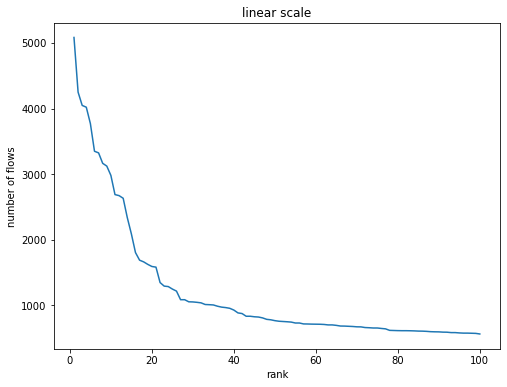

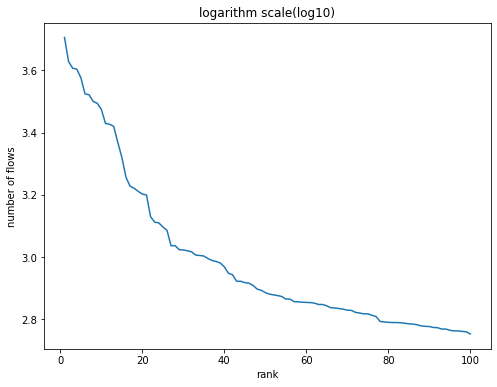

In [16]:
# plot the number of flows
flows_lin = []
flows_log = []

for i in range(0,100):
    flows_lin.append(top_flows[i][1])
    flows_log.append(np.log10(top_flows[i][1]))
flows_lin = np.array(flows_lin)
flows_log = np.array(flows_log)
xaxis = np.arange(1,101)

plt.figure(figsize=(8,6))
plt.plot(xaxis,flows_lin)
plt.xlabel('rank')
plt.ylabel('number of flows')
plt.title('linear scale')

plt.figure(figsize=(8,6))
plt.plot(xaxis,flows_log)
plt.xlabel('rank')
plt.ylabel('number of flows')
plt.title('logarithm scale(log10)')

In [ ]:
# fixed size 2^16
